In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import json

# static/zoomable/flare.json

In [2]:
panel3_task_year_df = pd.read_csv("../static/data/csv/Panel 3.csv")
panel3_job_skill_2008_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2008.csv")
panel3_job_skill_2019_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2019.csv")

In [3]:
panel3_task_year_df.head()

,Skill Id,Skill Name,Task,2019 Automation Level,2008 Automation Level,Change during 2008-2019
0,4.A.3.b.1,Interacting With Computers,Administrative Task,0.608170,0.632423,-0.024253
1,2.B.3.e,Programming,Administrative Task,0.588503,0.560941,0.027562
2,4.C.2.d.1.a,Spend Time Sitting,Administrative Task,0.572816,0.588516,-0.015700
3,4.A.4.c.1,Performing Administrative Activities,Administrative Task,0.550240,0.536965,0.013276
4,4.C.1.a.2.j,Letters and Memos,Administrative Task,0.531585,0.505103,0.026482


In [4]:
panel3_job_skill_2019_df.head()

,Job Code,Job Title,Active Learning,Wrist-Finger Speed,Number Facility,Electronic Mail,In an Open Vehicle or Equipment,"Guiding, Directing, and Motivating Subordinates",Exposed to High Places,"Inspecting Equipment, Structures, or Material",...,Negotiation,Exposed to Whole Body Vibration,Responsibility for Outcomes and Results,Critical Thinking,Documenting/Recording Information,Pace Determined by Speed of Equipment,Impact of Decisions on Co-workers or Company Results,Sound Localization,Selling or Influencing Others,Finger Dexterity
0,00-0000,TOTAL AVERAGE,0.005153,0.006004,0.006238,0.007199,0.004171,0.004526,0.004076,0.005198,...,0.005543,0.003324,0.004511,0.005597,0.005817,0.00592,0.004848,0.005148,0.006031,0.005871
1,11-1011,Chief Executives,0.011427,0.000000,0.008704,0.005994,0.000289,0.017453,0.000000,0.000000,...,0.018997,0.002607,0.012023,0.012390,0.000000,0.00000,0.013786,0.000000,0.011320,0.000000
2,11-1021,General and Operations Managers,0.008371,0.000000,0.004497,0.008413,0.000000,0.021092,0.002898,0.003211,...,0.020354,0.000000,0.020745,0.008813,0.001589,0.00000,0.014911,0.001704,0.016846,0.000000
3,11-2011,Advertising and Promotions Managers,0.005194,0.000000,0.010406,0.014330,0.000000,0.003663,0.000000,0.000000,...,0.015706,0.000000,0.013109,0.017165,0.000000,0.00000,0.006843,0.000000,0.026177,0.000000
4,11-2021,Marketing Managers,0.017921,0.000000,0.012927,0.010800,0.000000,0.018276,0.000000,0.000000,...,0.023033,0.000000,0.014231,0.009973,0.000000,0.00000,0.007969,0.000000,0.030220,0.000000


In [5]:
def standardizer(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.5 if value > 0.5 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [6]:
def standardizer_diff(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.6 if value > 0.6 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [7]:
panel3_task_year_df = standardizer(panel3_task_year_df, "2008 Automation Level")
panel3_task_year_df = standardizer(panel3_task_year_df, "2019 Automation Level")
panel3_task_year_df = standardizer_diff(panel3_task_year_df, "Change during 2008-2019")

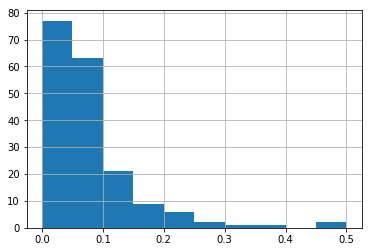

In [8]:
%matplotlib inline
panel3_task_year_df["2008 Automation Level"].hist()

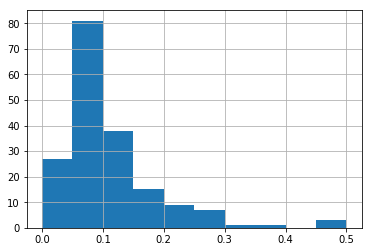

In [9]:
panel3_task_year_df["2019 Automation Level"].hist()

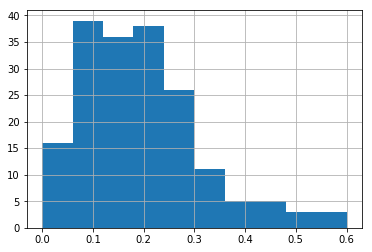

In [10]:
panel3_task_year_df["Change during 2008-2019"].hist()

In [11]:
cols = panel3_job_skill_2019_df.columns[3:]

for col in cols:
    panel3_job_skill_2019_df = standardizer(panel3_job_skill_2019_df, col)

In [12]:
cols = panel3_job_skill_2008_df.columns[3:]

for col in cols:
    panel3_job_skill_2008_df = standardizer(panel3_job_skill_2008_df, col)

In [13]:
panel3_task_year_df_gp = panel3_task_year_df.groupby('Task')

#grey 220,220,220
#crimson 220,20,60

In [14]:
color1 = [255,255,255]
color2 = [220,20,60]

In [15]:
for i in range(panel3_job_skill_2019_df.shape[0]):
    #print(panel3_job_skill_2019_df.iloc[i]['Job Code'], panel3_job_skill_2008_df.iloc[i]['Job Code'])
    
    skillmap = {}
    skillmap["name"] = panel3_job_skill_2019_df.iloc[i]['Job Title']
    skillmap["code"] = panel3_job_skill_2019_df.iloc[i]['Job Code']  
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for j, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance_2019": panel3_job_skill_2019_df.iloc[i][r2["Skill Name"]],
                                      "importance_2008":panel3_job_skill_2008_df.iloc[i][r2["Skill Name"]], 
                                      "importance_2008_2019": panel3_job_skill_2019_df.iloc[i][r2["Skill Name"]],
                                      
                                      "r_2019":(color2[0]*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),
                                      "g_2019":(color2[1]*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),
                                      "b_2019":(color2[2]*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),                                      
                                      "r_2008":(color2[0]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "g_2008":(color2[1]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(color2[2]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2019":(color2[0]*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    color1[0]*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                      "g_2008_2019":(color2[1]*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    color1[1]*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                      "b_2008_2019":(color2[2]*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    color1[2]*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                     })
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2019'+'.json', 'w') as outfile:
    with open('../static/data/network/'+panel3_job_skill_2019_df.iloc[i]['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)

In [16]:
"""
for i, r1 in zip(panel3_job_skill_2019_df.iterrows(), panel3_job_skill_2008_df.iterrows):
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance": r1[r2["Skill Name"]],
                                      "r_2019":220,
                                      "g_2019":(20*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),
                                      "b_2019":(60*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),                                      
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2019":220,
                                      "g_2008_2019":(20*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    220*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                      "b_2008_2019":(60*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    220*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2019'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""        

'\nfor i, r1 in zip(panel3_job_skill_2019_df.iterrows(), panel3_job_skill_2008_df.iterrows):\n    skillmap = {}\n    skillmap["name"] = r1[\'Job Title\']\n    skillmap["code"] = r1[\'Job Code\']\n    child_collection = []\n    \n    for nm, gp in panel3_task_year_df_gp:\n        child = {}\n        child["name"] = nm\n        child["children"] = []\n        \n        for i, r2 in gp.iterrows():\n            child["children"].append({"name": r2["Skill Name"],\n                                     "importance": r1[r2["Skill Name"]],\n                                      "r_2019":220,\n                                      "g_2019":(20*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+\n                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/\n                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automatio

In [17]:
"""
for i, r1 in panel3_job_skill_df.iterrows():
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"], "importance": r1[r2["Skill Name"]],
                                     "automation_2019": r2["2019 Automation Level"],
                                      "r_2019":220,
                                      "g_2019":(20*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),
                                                
                                      "b_2019":(60*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/
                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automation Level"].min()),                                      
                                     "automation_2008": r2["Change during 2008-2019"],   
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                     "automation_2008~2019": r2["Change during 2008-2019"],   
                                      "r_2008_2019":220,
                                      "g_2008_2019":(20*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    220*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                      "b_2008_2019":(60*(r2["Change during 2008-2019"]-panel3_task_year_df["Change during 2008-2019"].min())+
                                                    220*(panel3_task_year_df["Change during 2008-2019"].max()-r2["Change during 2008-2019"]))/
                                                (panel3_task_year_df["Change during 2008-2019"].max()-panel3_task_year_df["Change during 2008-2019"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2019'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""

'\nfor i, r1 in panel3_job_skill_df.iterrows():\n    skillmap = {}\n    skillmap["name"] = r1[\'Job Title\']\n    skillmap["code"] = r1[\'Job Code\']\n    child_collection = []\n    \n    for nm, gp in panel3_task_year_df_gp:\n        child = {}\n        child["name"] = nm\n        child["children"] = []\n        \n        for i, r2 in gp.iterrows():\n            child["children"].append({"name": r2["Skill Name"], "importance": r1[r2["Skill Name"]],\n                                     "automation_2019": r2["2019 Automation Level"],\n                                      "r_2019":220,\n                                      "g_2019":(20*(r2["2019 Automation Level"]-panel3_task_year_df["2019 Automation Level"].min())+\n                                                    220*(panel3_task_year_df["2019 Automation Level"].max()-r2["2019 Automation Level"]))/\n                                                (panel3_task_year_df["2019 Automation Level"].max()-panel3_task_year_df["2019 Automa